In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

# CH3F1 - Determination of Local Mobility at the Molecular Level
## Study the temperature dependence of hydrogen bond lifetimes
The average lifetime of hydrogen bonds in molecular liquids is a key dynamical property with important reverberations in physical chemistry, inclusing ydrophobic interactions, biochemical reactions and proteins function. In this Notebook we are going to use Python (a very popular coding/scripting language) to calculate these lifetimes from trajectories generated via classical molecular dynamics. In particular, we (well, a dedicated Python package...) will evaluate a so-called auto-correlation function $C_x(T)$ which, in a nutshell, keeps track in time of how often (on average!) a given hydrogen bond forms and/or breaks. This correlation function decays (or should decay...) exponentially as a function of time, and the characteristic lifetime $\tau$ we are looking for can be obtained as the integral of this function (in principle, from time zero up to infinity):

$
\tau = \int_0^{\infty} C_x(t)dt'
$

If you are curious about molecular simulations and/or correlation functions, [this paper](https://aip.scitation.org/doi/10.1063/1.4922445) would be a good starting point. For the time being, let's have a look at...

### Jupyter notebooks

<img src="./STUFF/jn_logo.png" width="300">

**This!** is actually a Jupyter notebook! It allows you to:

- Write down some text
- Write computer programs using a number of languages: we are going to use Python
- Visualize the outcome of your calculations
- Take advantage of powerful computational tools

All of this in one place! First things first...

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH3F1 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. Mobility_Lab.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! <br>
<div/>

## Right... but what - is - a Jupyter notebook exactly?
A Jupyter notebook is a collection of "cells" - blocks within which we can e.g. write down an equation or plot a function. We will use "Markdown cells" to write down text and equations, and "Code cells" to do everything else. Cells can be inserted (and copied, and pasted, and cut!) via the toolbar above. Once we are happy with the content of a given cell, we have to "Run" it - to execute it, by holding the shift key and hitting the enter/return key. The Jupyter notebook will take care of running the cell, and let us know if everything is ok. You can also run a cell, or indeed all the cells in a notebook, via the same toolbar above. Let's have a look at Markdown and Code cells, then...

### This is a Markdown cell
Thus, we can write into it! To edit the cell, a double click of the mouse should do.
We can play around with **bold text**, *italic text*, 
# Big Headings, 
## Small Headings, 
### Tiny Headings,
and much more. Importantly, we can also write down equations using LaTeX syntax. Say...

$$
A_{\text{Macroscopic}}=\langle a_{\text{Microscopic}} \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N}a_i
$$

Remember, LaTeX may look daunting at the beginning, but it is the best documented markup language in the world, and after a little while it becomes natural. In fact, journal articles and books are ultimately *all* typesetted in LaTeX!

In [2]:
string = "This is a Code cell"
print(string) 

This is a Code cell


### Wait, what happened?
In the cell above, we actually used some Python already! We did two things:

- 1. We have stored some text (**This is a code cell**) into a *variable* we have called **string**
- 2. We have printed the variable **string**

## P is for Python!
What's Python anyway? It's a programming language - one of many, such as C++ or Fortran. It is especially popular these days, mostly because there exist a phenomenal amount of Python libraries (or packages, or modules...) out there that can be harnessed for free. These can in turn be used to do all sort of interesting things, from machine learning for drug design to stock market analysis. This is the reason why a decent knowledge of Python is now often indicated as a desirable (transferable!) skill when interviewing for jobs in Pharma companies and finance alike.
<img src="./STUFF/python_logo.png" width="300">

Great - now that we know everything about Python, Jupyter Notebooks, Markdown and Code cells, we have what we need to make a start...

In [3]:
# This is a comment - the # tells Python to just ignore whatever follows

# First things first, we are going to "take advantage of powerful computational tools"
# Specifically, we are going to "import" the numpy library - an incredibly useful set of of Pythonic tools
# that will save us a lot of time when dealing with numbers. off we go...

import numpy as np # All set! We can now use numpy, and because we are lazy, each time we use it 
                   # we are going to call it via "np" as opposed to "numpy
import MDAnalysis  # This is a rather powerful package that allows you to analyse molecular dynamics trajectories 
from MDAnalysis.analysis import hbonds # This MDAnalysis function enables the calculation of hydrogen bonds lifetimes

import matplotlib.pyplot as plt # A package to plot our data/results   

In [4]:
# As a start, we store in a Python "object" (a collection of variables) the initial configuration of the system 
# (conf.pdb) as well as the molecular dynamics trajectory (traj_whole.xtc). Note that these files can be found
# in the ./STUFF directory (we have to tell Python where they are!)
traj = MDAnalysis.Universe("./STUFF/conf.pdb","./STUFF/traj_whole.xtc")

# Let's see how many atoms we have in our system... 
print(traj)

<Universe with 1536 atoms>


/anaconda3/envs/mda/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:195: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [5]:
# Let's have a look at the system...
# Scroll up/down to zoom out/in

from IPython.display import HTML

def atoms_to_html(atoms):
    'Return the html representation the atoms object as string'

    from tempfile import NamedTemporaryFile

    with NamedTemporaryFile('r+', suffix='.html') as ntf:
        atoms.write(ntf.name, format='html')
        ntf.seek(0)
        html = ntf.read()
    return html

import ase
from ase.io import read
struct = ase.io.read("./STUFF/conf.pdb")
struct_html = atoms_to_html(struct)
HTML(struct_html)

<div class=warn>
Knowing that we are simulating heptanol, how many molecules of the latter we have in the simulations box?
<div/>

In [6]:
# Then, we have to specify which atoms are we interested in. In this case, the hydrogen atoms belonging
# to the -OH group of heptanol (our donors)...
H_hep = traj.select_atoms('name H16') # This label depends on how we have defined our system topology...
# ... and our acceptors as well
O_hep = traj.select_atoms('name O1')

# Here, we define our hydrogen bonds. We have a few parameters to play around with...
# bond_type. It can be "continuous" or "intermittent".
# sample_time. The amount of time, in ps, that you wish to observe hydrogen bonds for
# nruns. The number of different start points within the trajectory to use
# nsamples. Within each run, the number of frames to analyse
# angle_crit. The angle (in degrees) which all bonds must be greater than - to be considered as HBs
# dist_crit. The maximum distance (in Angstroms) for a hydrogen bond

hb_methanol = hbonds.HydrogenBondAutoCorrel(traj, acceptors = O_hep,
              hydrogens = H_hep, donors = O_hep, bond_type='continuous',
              sample_time = 1000, nruns = 20, nsamples = 250, angle_crit = 160, dist_crit = 3.0, pbc = 'true')
hb_methanol.run()
hb_methanol.solve()
# This is the average lifetime of our hydrogen bonds, in ps
tau = hb_methanol.solution['tau']
time = hb_methanol.solution['time']
results = hb_methanol.solution['results']
estimate = hb_methanol.solution['estimate']

Performing run    20/20[100.0%]


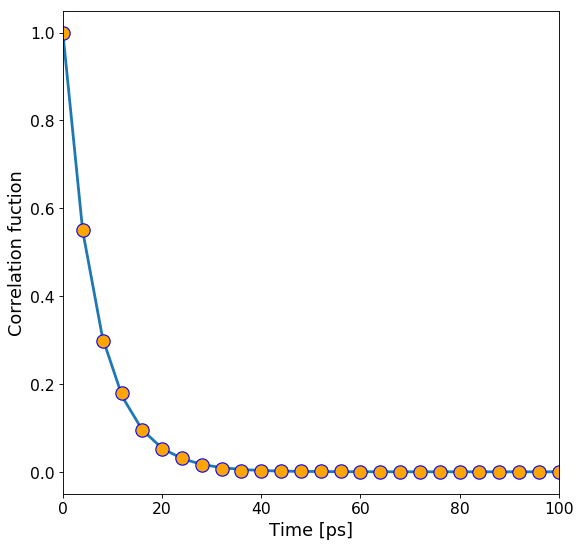

In [7]:
# Print the autocorrelation function
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

# Plot
plt.plot(time, estimate, linewidth=2.5)
plt.plot(time, results, 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', linewidth=2.5)


# Labeling of x and y axes
plt.xlabel('Time [ps]',fontsize=16)
plt.ylabel('Correlation fuction',fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

axes = plt.gca()
axes.set_xlim([0,100])
#axes.set_ylim([ymin,ymax])

# Show the final result
plt.show()


In [8]:
print(tau, "[ps]")

6.767870089959726 [ps]


<div class=warn>
<b>To be done...</b><br>
* Calculate the intermittent hydrogen bond lifetime
* Compare the two (continuous and intermittent) autocorrelation functions on the same graph
* Study the temperature dependence of the HB lifetimes using the trajectories traj_260/340.xtc
<div/>